In [18]:
import numpy as np
from PIL import Image
from scipy.ndimage import filters
import matplotlib.pyplot as plt

<h1 style="text-align: center"> Harris Corner Detector</h1>

$$ M_I = \nabla I \ \nabla I^T = \left[ \begin{matrix} I_x \\ I_y\end{matrix}\right]
                               \left[ \begin{matrix} I_x && I_y\end{matrix}\right] 
                            =  \left[ \begin{matrix} I_x^2 && I_xI_y \\
                                                     I_xI_y && I_Y^2 \end{matrix}\right]$$

$$ \overline{M}_I = W * M_I$$

$$ det\left( \overline{M}_I\right) - k\ trace \left( \overline{M}_I\right)^2 $$

$$ to\ get\ rid\ of\ weighting\ k\  : \frac{det\left( \overline{M}_I\right)}{trace \left( \overline{M}_I\right)^2}

In [10]:
def compute_harris_response(im, sigma=3) : 
    
    # Gaussian derivative
    imx = np.zeros(im.shape)
    filters.gaussian_filter(im, (sigma, sigma), (0,1), imx)
    imy = np.zeros(im.shape)
    filters.gaussian_filter(im, (sigma, sigma), (1,0), imy)

    # Compute components of the Harris matrix
    Wxx = filters.gaussian_filter(imx*imx, sigma)
    Wxy = filters.gaussian_filter(imx*imy, sigma)
    Wyy = filters.gaussian_filter(imy*imy, sigma)

    # Determinant and Trace
    Wdet  = Wxx*Wxy - Wxy**2
    Wtr = Wxx + Wyy

    return Wdet/Wtr

In [17]:
def get_harris_points(harrisim, min_dist=10, threshold = 0.1) :
    
    # find top corner candidates above a threshold
    corner_threshold = harrisim.max() * threshold
    harrisim_t = (harrisim > corner_threshold) * 1

    # get coordinates of candidates
    coords = np.array(harrisim_t.nonzero()).T

    # get candidates values
    candidates_values = [harrisim[c[0], c[1]] for c in coords]

    # sort candidates
    index = np.argsort(candidates_values)

    # store allowed point locations in array
    allowed_locations = np.zeros(harrisim.shape)
    allowed_locations[min_dist: -min_dist, min_dist: -min_dist] = 1
    
    # select the best points taking min_distance into account
    filtered_coords = list()
    for i in index :
        if allowed_locations[coords[i, 0], coords[i, 1]] == 1 :
            filtered_coords.append(coords[i])
            allowed_locations[(coords[i, 0] - min_dist): (coords[i, 0] + min_dist), (coords[i, 1] - min_dist): (coords[i, 1] + min_dist)] = 0
    
    return filtered_coords

In [39]:
def plot_harris_points(image, filtered_coords) :

    plt.figure(figsize=(10,10))
    plt.imshow(im)
    plt.plot([p[1] for p in filtered_coords], [p[0] for p in filtered_coords], 'r*')
    plt.axis('off')
    plt.show()

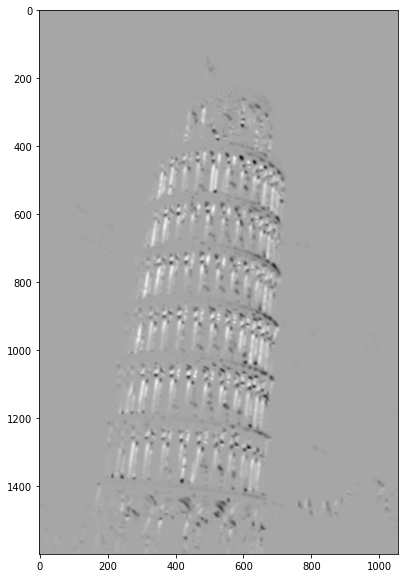

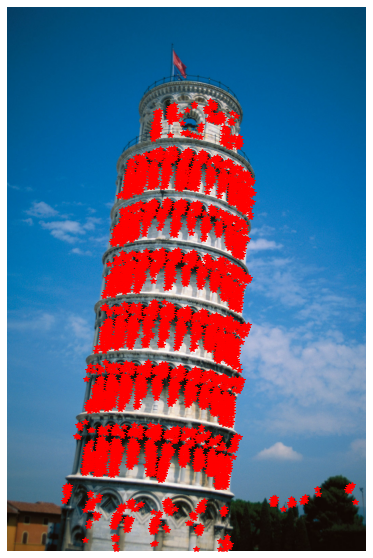

In [69]:
pil_im = Image.open('./images/Leaning-Tower-of-Pisa-Italy.jpg')
im = np.array(pil_im)
im_grey = np.array(pil_im.convert('L'))

harrisim = compute_harris_response(im_grey, sigma=3)
filtered_coords = get_harris_points(harrisim, min_dist=6, threshold = 0.1)
plt.figure(figsize=(10,10))
plt.imshow(harrisim, cmap='gray')
plot_harris_points(im, filtered_coords)